5장 모델 평가
------

In [39]:
# example code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import mglearn
import warnings
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc
warnings.filterwarnings(action='ignore')
apple = font_manager.FontProperties(fname = '/Library/Fonts/AppleGothic.ttf').get_name()
rc('font', family = apple)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
X, y = make_blobs(random_state=0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Return the mean accuracy on the given test data and labels.
# logreg.score?

logreg.score(X_test, y_test)

0.88

## 5.1 Cross_validation : 교차 검증

데이터를 여러 번 반복해서 나누고 여러 모델을 학습
- 가장 널리 사용되는 방법은 K-fold cross_validation

  
  
### K-fold cross_validation
- k 는 특정 숫자, 보통 5 또는 10을 사용
- 데이터를 먼저 fold(폴드) 라고 하는 (거의) 비슷한 크기의 '부분 집합' 다섯 개로 나눔
- 그 다음 일련의 모델을 만듬
  - 첫 번째 모델은 첫 번째 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련 세트로 사용하여 학습, 즉 이 모델은 폴드 2~5까지의 데이터를 사용해 만들어지고 폴드 1을 사용해 정확도를 평가
  - 두 번쨰 모델은 두 번째 폴드를 테스트 세트로 사용하고 1,3,4,5 폴드를 훈련 데이터로 사용
  - 다섯 번의 분할 측정 후 결과를 냄

In [14]:
import mglearn

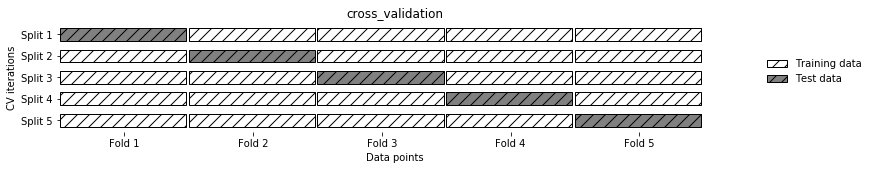

In [16]:
mglearn.plots.plot_cross_validation()

### 5.1.1 scikit-learn의 교차 검증

scikit-learn의 교차 검증은 model_selection 모듈의 cross_val_score 함수로 구현됨
- 매개변수는 모델과 훈련 데이터, 타깃 레이블

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [19]:
iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print(f"cross val socre : {scores}")

cross val socre : [0.96666667 1.         0.93333333 0.96666667 1.        ]


/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
# 보통 간단하게 나타내려고 평균을 냄

print(f"cross val mean score : {scores.mean()}")

cross val mean score : 0.9733333333333334


In [21]:
# cross_val_score 와 비슷한 결과를 주는데 dict로 리턴함

from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'fit_time': array([0.01690888, 0.01739883, 0.01472616, 0.01435423, 0.01360679]),
 'score_time': array([0.00029111, 0.00030327, 0.00020576, 0.00019193, 0.00017214]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [24]:
res_df = pd.DataFrame(res)
display(res_df)

,fit_time,score_time,test_score,train_score
0,0.016909,0.000291,0.966667,0.966667
1,0.017399,0.000303,1.000000,0.966667
2,0.014726,0.000206,0.933333,0.983333
3,0.014354,0.000192,0.966667,0.983333
4,0.013607,0.000172,1.000000,0.975000


In [26]:
res_df.mean()

fit_time       0.015399
score_time     0.000233
test_score     0.973333
train_score    0.975000
dtype: float64

### 5.1.2 교차 검증의 장점

**장점**
- train_test_split은 무작위로 나눌 경우 운에 의해 데이터 셋이 결정됨(한쪽에 쏠릴 경우도 발생)
- 교차검증을 이용하면 테스트 세트에 각 샘플이 정확하게 한 번씩 들어감
  - 각 샘플은 폴드 중 하나에 속하며, 각 폴드는 한 번씩 테스트 세트가 됨
  - 그렇기 때문에 교차 검증의 점수를 높이기 위해서 모든 샘플에 있는 모델일 일반화가 잘 되어야 함
- 데이터를 여러개로 나누다 보면 모델이 train data에 얼마나 민감한지 알 수 있다.
  - iris 데이터로 90~100%가 나왔는데 범위가 넒음
  - 이를 바탕으로 새로운 데이터를 적용했을 때 최악과 최선의 경우를 짐작할 수 있음
- train_test_split처럼 분할을 한 번 하는 것보다 더 효율적으로 데이터를 사용 할 수 있음

**단점**
- 연산 비용 증가
- 대략 모델 개수만큼 느림

**Notice**
- 교차 검증은 새로운 데이터에 적용할 모델을 만드는 방법이 아니라는 것을 잊지 말아야 함
- 교차 검증 함수는 모델을 반환하지 않음
- 교차 검증의 목적은 단지 주어진 데이터셋에 학습된 알고리즘이 얼마나 잘 일반화될지 평가하는 것

### 5.1.3 계층별 K-겹 교차 검증과 그외 전략들

항상 K-fold로 나누는 건 좋지 않다. iris를 보자

In [27]:
iris = load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- 1/3은 0 클래스, 1/3은 1 클래스, 나머지 1/3은 2 클래스
- 교차 검증을 하면 특정 데이터만 가지게 된다.
- 이를 방지하기 위해서는 Stratified k-fold cross-validation(계층별 k-겹 교차 검증)을 사용
  - 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눔

cross_val_score 함수에서 폴드를 나눌 때...
- 분류 : StratifiedKFold 사용
- 회귀 : 단순 KFold 사용

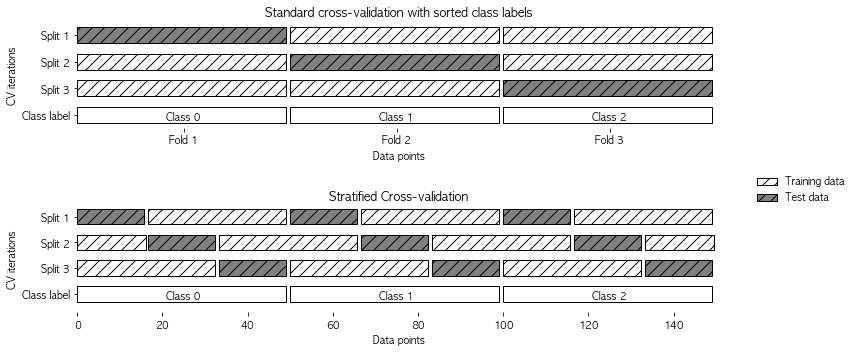

In [28]:
mglearn.plots.plot_stratified_cross_validation()

#### 교차 검증 상세 옵션

- cv parameter를 이용하여 폴드 개수 조정
- 교차 검증 분할기(cross-validation splitter)를 전달함으로써 데이털르 분할할 때 더 세밀하게 제어 가능

In [29]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [30]:
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [31]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [33]:
# KFold with suffle

kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

#### LOOCV

- Leave-one-out cross-validation
- 교차 검증은 폴드 하나에 샘플 하나만 들어 있는 k-겹 교차 검증
- 각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용
- 데이터셋이 클 때는 시간이 매우 오래 걸리지만, 작은 데이터셋에서는 이따금 더 좋은 결과를 가져옴

In [40]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


#### 임의 분할 교차 검증
- 입력 예정

#### 그룹별 교차 검증
- 입력 예정

#### 반복 교차 검증
- 입력 예정